a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

In [1]:
import scipy.io as sio
mat_test=sio.loadmat('AgeGenderClassification/eventest')
mat_train=sio.loadmat('AgeGenderClassification/eventrain')
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]
print(data_train[1].shape)
print(data_test[1].shape)

(3500, 1)
(1050, 1)


Se cuentan con 3500 datos de entrenamiento y 1050 de validación.

b) Eliga cuál representación utilizará para trabajar los datos y entregárselos como input al modelo neuronal denso. Además extraiga las etiquetas del problema. Describa los datos utilziados.



In [2]:
for i in range(6):
    print(data_train[i].shape)

(3500, 14)
(3500, 1)
(3500, 1)
(3500, 37)
(3500, 600)
(3500, 2989)


[0]: Features: posicion, tamaño relativo, angulo, etc <br>
[1]: Edad <br>
[2]: Sexo <br>
[3]: fisherface space  (representación de baja dimensionalidad similar a eigenfaces, donde estos serian los eigenvalues) <br>
[5]: imagen original (fila de 2989 (61x49))<br>

/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


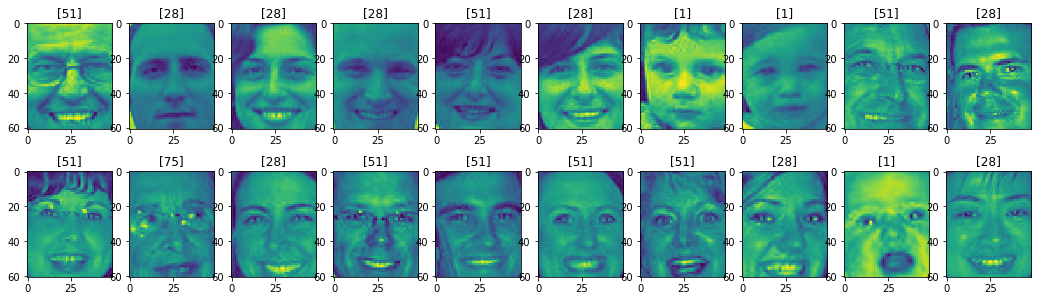

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"]=[18,5]
for i in range(20):
    plt.subplot(2,10,i+1);
    plt.title(data_train[1][i])
    plt.imshow(np.reshape(data_train[5][i],[49,61]).T);


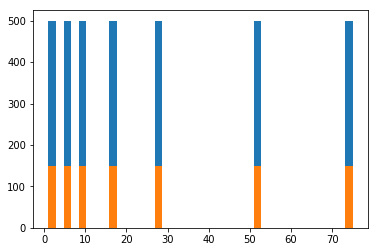

In [4]:
plt.hist(data_train[1],bins=40);
plt.hist(data_test[1],bins=40);

Se elige utilizar como entrada las imagenes originales (normalizadas), ya que esto da más generalidad a la solución. Con esta solución seria necesario solo detectar el ROI donde se encuentra una cara, y no hacer más preprocesamiento. Además se elige tomar el problema como uno multiclase, por lo que se convertira las etiquetas de salida en un "one hot vector", es decir un vector de ceros, con un uno en la posición de la etiqueta a la que corresponde. 

c) Defina y entrene una modelo de red neuronal feed forward para la inferencia de la edad de la persona a través de la representación escogida. Intente llegar a un mse menor a 100 en el conjunto de pruebas. Recuerde que NO puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.

In [5]:
def map_clases(arg):
    switcher = {
        1:0,
        5:1,
        10:2,
        16:3,
        28:4,
        51:5,
        75:6
    }
    return switcher.get(arg,-1)

In [6]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD,Adam
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.metrics import categorical_accuracy
x_train=data_train[5];
x_val=data_test[5];

scaler = StandardScaler().fit(x_train)
X_train_scaled = pd.DataFrame(scaler.transform(x_train))
X_val_scaled = pd.DataFrame(scaler.transform(x_val))

#mapeo
y_train_map=[map_clases(int(data_train[1][i])) for i in range(len(data_train[1]))];
y_val_map=[map_clases(int(data_test[1][i])) for i in range(len(data_test[1]))];

y_train = keras.utils.to_categorical(y_train_map,num_classes=7);
y_val = keras.utils.to_categorical(y_val_map,num_classes=7);

model = Sequential()
model.add(Dense(512, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(7, kernel_initializer='uniform',activation="softmax"))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[categorical_accuracy])
history = model.fit(X_train_scaled, y_train,batch_size=32, epochs=150, verbose=1, validation_data=(X_val_scaled, y_val))


Using TensorFlow backend.
/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 3500 samples, validate on 1050 samples
Epoch 1/150
3500/3500 [==============================] - 14s 4ms/step - loss: 1.9080 - categorical_accuracy: 0.2031 - val_loss: 1.7645 - val_categorical_accuracy: 0.2848
Epoch 2/150
3500/3500 [==============================] - 1s 207us/step - loss: 1.7511 - categorical_accuracy: 0.2969 - val_loss: 1.6500 - val_categorical_accuracy: 0.3552
Epoch 3/150
3500/3500 [==============================] - 1s 209us/step - loss: 1.6494 - categorical_accuracy: 0.3151 - val_loss: 1.6397 - val_categorical_accuracy: 0.3314
Epoch 4/150
3500/3500 [==============================] - 1s 204us/step - loss: 1.6004 - categorical_accuracy: 0.3531 - val_loss: 1.6115 - val_categorical_accuracy: 0.3333
Epoch 5/150
3500/3500 [==============================] - 1s 206us/step - loss: 1.5722 - categorical_accuracy: 0.3643 - val_loss: 1.6066 - val_categorical_accuracy: 0.3276
Epoch 6/150
3500/3500 [==============================] - 1s 208us/step - loss: 1.5356 - categorica

3500/3500 [==============================] - 1s 191us/step - loss: 1.1696 - categorical_accuracy: 0.5329 - val_loss: 1.5205 - val_categorical_accuracy: 0.4086
Epoch 49/150
3500/3500 [==============================] - 1s 187us/step - loss: 1.1563 - categorical_accuracy: 0.5306 - val_loss: 1.5051 - val_categorical_accuracy: 0.4314
Epoch 50/150
3500/3500 [==============================] - 1s 189us/step - loss: 1.1580 - categorical_accuracy: 0.5351 - val_loss: 1.5831 - val_categorical_accuracy: 0.3924
Epoch 51/150
3500/3500 [==============================] - 1s 210us/step - loss: 1.1329 - categorical_accuracy: 0.5337 - val_loss: 1.5164 - val_categorical_accuracy: 0.3990
Epoch 52/150
3500/3500 [==============================] - 1s 185us/step - loss: 1.1364 - categorical_accuracy: 0.5363 - val_loss: 1.5286 - val_categorical_accuracy: 0.4086
Epoch 53/150
3500/3500 [==============================] - 1s 193us/step - loss: 1.1211 - categorical_accuracy: 0.5457 - val_loss: 1.5191 - val_categorica

Epoch 96/150
3500/3500 [==============================] - 1s 181us/step - loss: 0.9852 - categorical_accuracy: 0.6126 - val_loss: 1.5228 - val_categorical_accuracy: 0.4181
Epoch 97/150
3500/3500 [==============================] - 1s 184us/step - loss: 0.9800 - categorical_accuracy: 0.6197 - val_loss: 1.5795 - val_categorical_accuracy: 0.4295
Epoch 98/150
3500/3500 [==============================] - 1s 203us/step - loss: 0.9596 - categorical_accuracy: 0.6103 - val_loss: 1.6965 - val_categorical_accuracy: 0.4019
Epoch 99/150
3500/3500 [==============================] - 1s 193us/step - loss: 0.9844 - categorical_accuracy: 0.6003 - val_loss: 1.6000 - val_categorical_accuracy: 0.4029
Epoch 100/150
3500/3500 [==============================] - 1s 185us/step - loss: 0.9675 - categorical_accuracy: 0.6057 - val_loss: 1.5898 - val_categorical_accuracy: 0.4390
Epoch 101/150
3500/3500 [==============================] - 1s 183us/step - loss: 0.9990 - categorical_accuracy: 0.6046 - val_loss: 1.6701 -

3500/3500 [==============================] - 1s 205us/step - loss: 0.8438 - categorical_accuracy: 0.6746 - val_loss: 1.7959 - val_categorical_accuracy: 0.4305
Epoch 144/150
3500/3500 [==============================] - 1s 212us/step - loss: 0.8672 - categorical_accuracy: 0.6631 - val_loss: 1.6827 - val_categorical_accuracy: 0.4219
Epoch 145/150
3500/3500 [==============================] - 1s 203us/step - loss: 0.9256 - categorical_accuracy: 0.6571 - val_loss: 1.7358 - val_categorical_accuracy: 0.4248
Epoch 146/150
3500/3500 [==============================] - 1s 197us/step - loss: 0.8889 - categorical_accuracy: 0.6680 - val_loss: 1.6562 - val_categorical_accuracy: 0.4029
Epoch 147/150
3500/3500 [==============================] - 1s 197us/step - loss: 0.9030 - categorical_accuracy: 0.6557 - val_loss: 1.7478 - val_categorical_accuracy: 0.4038
Epoch 148/150
3500/3500 [==============================] - 1s 195us/step - loss: 0.8709 - categorical_accuracy: 0.6660 - val_loss: 1.6707 - val_categ

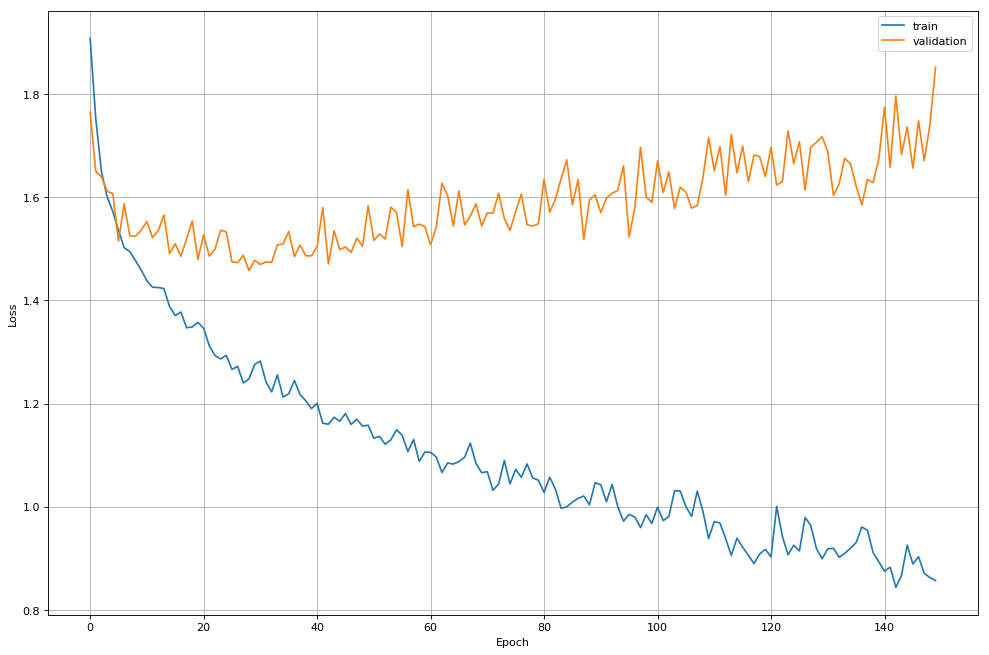

In [7]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.legend();
plt.grid()
plt.show()

In [8]:
match=np.sum(np.argmax(model.predict(X_val_scaled),axis=1)==np.argmax(y_val,axis=1));
print('aciertos='+str(match));
length=len(X_val_scaled);
print('largo='+str(length))
print('proporcion='+str(match/length))

aciertos=439
largo=1050
proporcion=0.4180952380952381


In [9]:
map_clases_inv=[1,5,10,16,28,51,75]
predict=[map_clases_inv[np.argmax(model.predict(X_val_scaled),axis=1)[i]] for i in range(len(X_val_scaled))];
mse=1/len(X_val_scaled)*np.sum([(predict[i]-int(data_test[1][i]))**2 for i in range(len(X_val_scaled))]);
print('mse='+str(mse))

mse=409.32380952380953


Si bien se eligio utilizar solo la información de las imagenes a continuación se entrena el mismo modelo, pero ahora de entrada se entrega además el resto de información que se tiene en los primeros 5 conjuntos de datos, ya que de estos puede ser util para un modelo más optimo el saber el sexo, o el angulo, por dar algunos ejemplos.

In [10]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD,Adam
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.metrics import categorical_accuracy
x_train=np.vstack((data_train[0].T,data_train[2].T,data_train[3].T,data_train[5].T)).T
x_val=np.vstack((data_test[0].T,data_test[2].T,data_test[3].T,data_test[5].T)).T
scaler = StandardScaler().fit(x_train)
X_train_scaled = pd.DataFrame(scaler.transform(x_train))
X_val_scaled = pd.DataFrame(scaler.transform(x_val))

#mapeo
y_train_map=[map_clases(int(data_train[1][i])) for i in range(len(data_train[1]))];
y_val_map=[map_clases(int(data_test[1][i])) for i in range(len(data_test[1]))];

y_train = keras.utils.to_categorical(y_train_map,num_classes=7);
y_val = keras.utils.to_categorical(y_val_map,num_classes=7);

model = Sequential()
model.add(Dense(512, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(7, kernel_initializer='uniform',activation="softmax"))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[categorical_accuracy])
history = model.fit(X_train_scaled, y_train,batch_size=32, epochs=150, verbose=1, validation_data=(X_val_scaled, y_val))


Train on 3500 samples, validate on 1050 samples
Epoch 1/150
3500/3500 [==============================] - 1s 321us/step - loss: 1.9121 - categorical_accuracy: 0.1937 - val_loss: 1.7404 - val_categorical_accuracy: 0.2867
Epoch 2/150
3500/3500 [==============================] - 1s 193us/step - loss: 1.7135 - categorical_accuracy: 0.2914 - val_loss: 1.6007 - val_categorical_accuracy: 0.3533
Epoch 3/150
3500/3500 [==============================] - 1s 193us/step - loss: 1.6061 - categorical_accuracy: 0.3366 - val_loss: 1.5448 - val_categorical_accuracy: 0.3600
Epoch 4/150
3500/3500 [==============================] - 1s 198us/step - loss: 1.5464 - categorical_accuracy: 0.3714 - val_loss: 1.5257 - val_categorical_accuracy: 0.3743
Epoch 5/150
3500/3500 [==============================] - 1s 193us/step - loss: 1.5036 - categorical_accuracy: 0.3737 - val_loss: 1.5061 - val_categorical_accuracy: 0.3610
Epoch 6/150
3500/3500 [==============================] - 1s 196us/step - loss: 1.4645 - categoric

3500/3500 [==============================] - 1s 193us/step - loss: 1.0552 - categorical_accuracy: 0.5706 - val_loss: 1.3447 - val_categorical_accuracy: 0.4600
Epoch 49/150
3500/3500 [==============================] - 1s 197us/step - loss: 1.0306 - categorical_accuracy: 0.5851 - val_loss: 1.3652 - val_categorical_accuracy: 0.4800
Epoch 50/150
3500/3500 [==============================] - 1s 191us/step - loss: 1.0043 - categorical_accuracy: 0.5989 - val_loss: 1.3836 - val_categorical_accuracy: 0.4590
Epoch 51/150
3500/3500 [==============================] - 1s 191us/step - loss: 1.0222 - categorical_accuracy: 0.5923 - val_loss: 1.4083 - val_categorical_accuracy: 0.4629
Epoch 52/150
3500/3500 [==============================] - 1s 189us/step - loss: 0.9825 - categorical_accuracy: 0.6069 - val_loss: 1.2955 - val_categorical_accuracy: 0.4781
Epoch 53/150
3500/3500 [==============================] - 1s 191us/step - loss: 1.0153 - categorical_accuracy: 0.5871 - val_loss: 1.3479 - val_categorica

Epoch 96/150
3500/3500 [==============================] - 1s 191us/step - loss: 0.8480 - categorical_accuracy: 0.6543 - val_loss: 1.4890 - val_categorical_accuracy: 0.4800
Epoch 97/150
3500/3500 [==============================] - 1s 188us/step - loss: 0.8614 - categorical_accuracy: 0.6629 - val_loss: 1.4367 - val_categorical_accuracy: 0.4790
Epoch 98/150
3500/3500 [==============================] - 1s 190us/step - loss: 0.8570 - categorical_accuracy: 0.6617 - val_loss: 1.4294 - val_categorical_accuracy: 0.4524
Epoch 99/150
3500/3500 [==============================] - 1s 192us/step - loss: 0.8100 - categorical_accuracy: 0.6803 - val_loss: 1.4693 - val_categorical_accuracy: 0.4676
Epoch 100/150
3500/3500 [==============================] - 1s 190us/step - loss: 0.8616 - categorical_accuracy: 0.6677 - val_loss: 1.4047 - val_categorical_accuracy: 0.4552
Epoch 101/150
3500/3500 [==============================] - 1s 190us/step - loss: 0.8686 - categorical_accuracy: 0.6623 - val_loss: 1.4107 -

3500/3500 [==============================] - 1s 193us/step - loss: 0.7460 - categorical_accuracy: 0.7240 - val_loss: 1.5799 - val_categorical_accuracy: 0.4781
Epoch 144/150
3500/3500 [==============================] - 1s 191us/step - loss: 0.7341 - categorical_accuracy: 0.7094 - val_loss: 1.5136 - val_categorical_accuracy: 0.4790
Epoch 145/150
3500/3500 [==============================] - 1s 190us/step - loss: 0.7392 - categorical_accuracy: 0.7151 - val_loss: 1.6563 - val_categorical_accuracy: 0.4676
Epoch 146/150
3500/3500 [==============================] - 1s 193us/step - loss: 0.7330 - categorical_accuracy: 0.7163 - val_loss: 1.5474 - val_categorical_accuracy: 0.4619
Epoch 147/150
3500/3500 [==============================] - 1s 193us/step - loss: 0.7360 - categorical_accuracy: 0.7189 - val_loss: 1.5930 - val_categorical_accuracy: 0.4695
Epoch 148/150
3500/3500 [==============================] - 1s 191us/step - loss: 0.7550 - categorical_accuracy: 0.7146 - val_loss: 1.7585 - val_categ

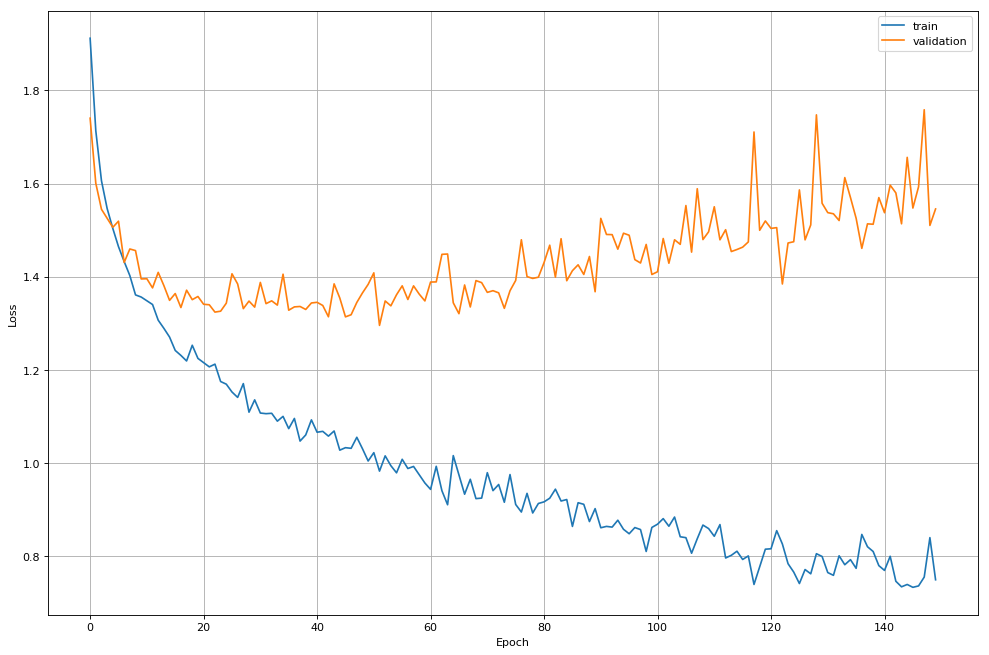

In [11]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.legend();
plt.grid()
plt.show()

In [12]:
match=np.sum(np.argmax(model.predict(X_val_scaled),axis=1)==np.argmax(y_val,axis=1));
print('aciertos='+str(match));
length=len(X_val_scaled);
print('largo='+str(length))
print('proporcion='+str(match/length))

aciertos=490
largo=1050
proporcion=0.4666666666666667


In [13]:
predict=[map_clases_inv[np.argmax(model.predict(X_val_scaled),axis=1)[i]] for i in range(len(X_val_scaled))];
mse=1/len(X_val_scaled)*np.sum([(predict[i]-int(data_test[1][i]))**2 for i in range(len(X_val_scaled))]);
print('mse='+str(mse))

mse=331.12095238095236


Podemos ver que si bien el desempeño mejoro un poco, no fue en gran cantidad. Solo se tiene un aumento de un ~5% en la exactitud de la predicción y el MSE bajo en ~70. A pesar de que en ningun caso se obtuvo un desempeño excepcional.
